In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer 
stopwords_list = 'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
data = pd.read_excel('dataset.xlsx')

data.head(10)

,id,text,label
0,1.0,দুদিন আগে ঘুরে আসলাম।এখন জায়গাটা মিস করতেছি।,positive
1,2.0,গান টা ভালো,positive
2,3.0,ছবিটা তো সেই 🤣🤣,positive
3,4.0,"দারুণ মানিয়েছে তোমাদের,, অনেক শুভকামনা 🤭",positive
4,5.0,"ওরে চিটার, ওরে বাটপার।",negative
5,6.0,আমার কিছুই বলার নাই এই ব্যাপারে,neutral
6,7.0,পাপ তার বাপকে ছাড়ে না।,negative
7,8.0,ছেলেটার চেহেরা দেখে মায়া হচ্ছে।,positive
8,9.0,নরওয়ের কোথায় থাকেন আপনি??,neutral
9,10.0,"এজন্য নরওয়েকে বলা হয় ""নিশীথ সূর্যের দেশ""।",neutral


In [ ]:
data.dropna(inplace=True)

In [ ]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.label=='positive']),
      "\nTotal Negative Reviews:",len(data[data.label=='negative']),
      "\nTotal Neutral Reviews:",len(data[data.label=='neutral']))

Total Reviews: 12122 
Total Positive Reviews: 4061 
Total Negative Reviews: 4033 
Total Neutral Reviews: 4028


In [ ]:
data.columns

Index(['id', 'text', 'label'], dtype='object')

In [ ]:
sample_data = [10,100,150,200,250,600,650,666,689,640,650,700,750,800,1000]
for i in sample_data:
      print(data.text[i],'\n','Sentiment:-- ',data.label[i],'\n')

মানুষ তো আপনাদের গুলো দেখছেই তাই মিথ্যা নাটক আর দেখার প্রয়োজন নাই 
 Sentiment:--  negative 

যুদ্ধ কখনো শান্তি আনতে পারবে না।এর ফল ভোগ করতে হতে পারে পুরো বিশ্বকে 
 Sentiment:--  positive 

ব্যবসা করবি কর, ধর্ম নিয়ে কেন করবি। 
 Sentiment:--  negative 

ধন্যবাদ আপনাকে এরকম একটা গুরুত্বপূর্ণ সংবাদ পরিচালনা করার জন্য 
 Sentiment:--  positive 

কিছু বেকার থাকবেই অস্বাভাবিক নহে উন্নত রাষ্ট্রের যদি বেকার মানুষ থাকে তাহলে আমাদের মতো দেশে তো আর বেশি থাকার কথা।যাই হোক দোয়া করি যাতে বেকারত্ব দিন দিন কমে যাক বাংলাদেশের কেউ যাতে অকর্মঠ হয় সবাই কাজ করে খাক এই কামনাই রইল। 
 Sentiment:--  negative 

বয়স কত আপনার? 
 Sentiment:--  neutral 

যুদ্ধ নয় আলোচনার মাধ্যমে সমাধান হোক 
 Sentiment:--  neutral 

হাসিনার নেতৃত্ব ছাড়া এমন সম্পর্ক অসম্ভব 
 Sentiment:--  neutral 

তদন্ত শুরু হইলে তো শেষের প্রশ্ন আসতো। 
 Sentiment:--  neutral 

সরকরের পা চেটে সাবার করছেন, আবার দাবি করেন নিরপেক্ষ নির্বাচন কমিশন। 
 Sentiment:--  negative 

যুদ্ধ নয় আলোচনার মাধ্যমে সমাধান হোক 
 Sentiment:--  neutral 

এই সংবাদ পড়ার পর 

In [ ]:
data

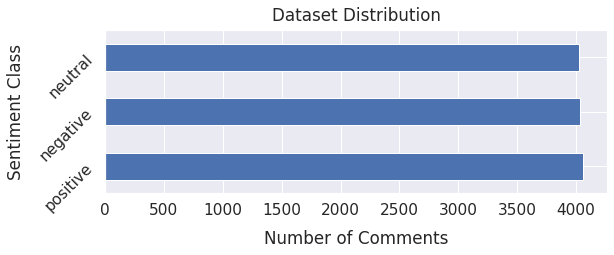

In [ ]:
sns.set(font_scale=1.4)
data['label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stopwords_list ='bangla_stopwords.txt'

In [ ]:
import re
from nltk.tokenize import word_tokenize
def process_reviews(reviews): 
    #Unnecessary punctuation,emoji,number remove
    reviews = re.sub('[^\u0980-\u09FF]',' ',str(reviews)) 
    
    #tokenize
    result =  word_tokenize(str(reviews))
    
    #Stopword remove
    stpw = open(stopwords_list,'r',encoding='utf-8').read()
    result = reviews.split()
    reviews = [word.strip() for word in result if word not in stpw ]
    reviews =" ".join(reviews)
    return reviews

In [ ]:
data['cleaned_Reviews'] = data['text'].apply(process_reviews)  

sample_data ='সার্ভিসটা খুব ভাল এবং খাবারের মান ও খুব ভাল।'
cl_review=process_reviews(sample_data)
print("Original Review:",sample_data)
print("Cleaned Review:",cl_review)

Original Review: সার্ভিসটা খুব ভাল এবং খাবারের মান ও খুব ভাল।
Cleaned Review: সার্ভিসটা ভাল খাবারের মান ভাল


In [ ]:
data['length'] = data['cleaned_Reviews'].apply(lambda x:len(x.split()))

# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = data.reset_index(drop = True)

In [ ]:
print("Maximum Length of a Review:",max(dataset.length))
print("Minimum Length of a Review:", min(dataset.length))
print("Average Length of a Review:",round(np.mean(dataset.length),0))

Maximum Length of a Review: 74
Minimum Length of a Review: 0
Average Length of a Review: 11.0


In [ ]:
dataset=dataset[['cleaned_Reviews','label']]
dataset.head(5)

,cleaned_Reviews,label
0,দুদিন ঘুরে আসলাম জায়গাটা মিস করতেছি,positive
1,গান ভালো,positive
2,ছবিটা,positive
3,দারুণ মানিয়েছে তোমাদের শুভকামনা,positive
4,ওরে চিটার ওরে বাটপার,negative


In [ ]:
#Dataset Summary

def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip() for t in list(dataset.cleaned_Reviews) for word in t.strip().split()]
    class_label= [k for k,v in dataset.label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip() for t in list(dataset[dataset.label==label].cleaned_Reviews) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
                
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        
        # Documents per class
        documents.append(len(list(dataset[dataset.label==label].cleaned_Reviews)))
        
        # Total Word per class
        words.append(len(word_list))
        
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.label==label].cleaned_Reviews))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
                
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label


documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  positive
Number of Documents:4061
Number of Words:45322
Number of Unique Words:13643
Most Frequent Words:

ভালো	379
কথা	243
দেশের	229
একটা	205
ভাল	204
ধন্যবাদ	190
সাথে	184
বাংলাদেশ	181
বাংলাদেশের	172
হয়ে	168

Class Name :  negative
Number of Documents:4033
Number of Words:46296
Number of Unique Words:13470
Most Frequent Words:

টাকা	383
কথা	286
দেশের	233
হয়ে	221
দিয়ে	215
সরকার	209
যায়	205
দেশে	179
মানুষ	172
একটা	164

Class Name :  neutral
Number of Documents:4028
Number of Words:37856
Number of Unique Words:12711
Most Frequent Words:

কথা	203
টাকা	172
হয়ে	168
একটা	162
সাথে	155
দেশের	154
যায়	144
ভালো	138
দিয়ে	136
হয়েছে	118
Total Number of Unique Words:26744


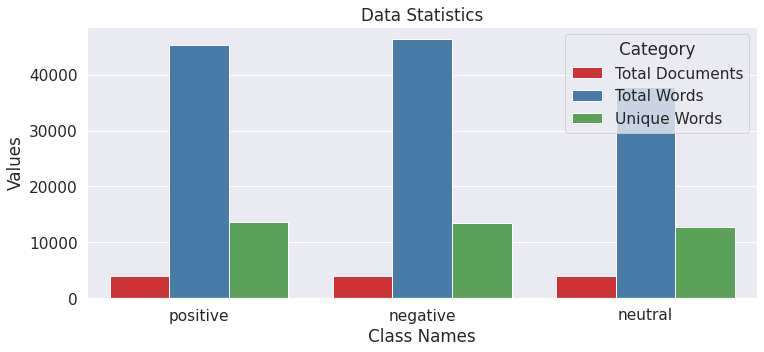

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,'Total Words':words,'Unique Words':u_words,'Class Names':class_names})

df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
sns.set(font_scale=1.4,palette='Set1')
plt.figure(figsize=(12, 5))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=0);

In [ ]:
dataset['label']=dataset['label'].replace({'positive':1,'negative':0,'neutral':2})
dataset.head()

,cleaned_Reviews,label
0,দুদিন ঘুরে আসলাম জায়গাটা মিস করতেছি,1
1,গান ভালো,1
2,ছবিটা,1
3,দারুণ মানিয়েছে তোমাদের শুভকামনা,1
4,ওরে চিটার ওরে বাটপার,0


In [ ]:
labels=dataset.label
labels

0        1
1        1
2        1
3        1
4        0
        ..
12117    2
12118    2
12119    2
12120    2
12121    2
Name: label, Length: 12122, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1 = TfidfVectorizer(ngram_range=(1,1),use_idf=True,tokenizer=lambda x: x.split()) 
X = tfidf1.fit_transform(dataset['cleaned_Reviews'])
y=dataset['label']
print("Shape of TF-IDF:",X.shape,'\n')

Shape of TF-IDF: (12122, 26744) 



In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Class=1, n=4061 (33.333%)
Class=0, n=4061 (33.333%)
Class=2, n=4061 (33.333%)


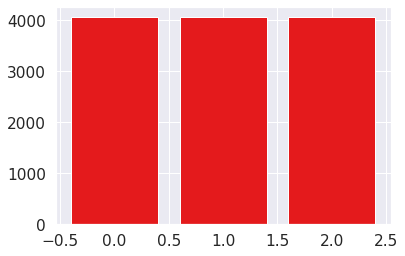

In [ ]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
review='দারুণ মানিয়েছে তোমাদের শুভকামনা	'
print("Sample Review: ",review)
vector = tfidf1.transform([review])
df = pd.DataFrame(vector.T.todense(), index=tfidf1.get_feature_names(), columns=["tfidf"])
a = df.sort_values(by=["tfidf"],ascending=False)
print(a[0:len(review.split())])

Sample Review:  দারুণ মানিয়েছে তোমাদের শুভকামনা	
             tfidf
মানিয়েছে  0.614470
দারুণ     0.479038
তোমাদের   0.447460
শুভকামনা  0.439009


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size = 0.9, test_size = 0.1,random_state =0)

print('Shape of X_train:', xtrain.shape)
print('Shape of X_test:', xtest.shape)
print('Shape of Y_train:', ytrain.shape)
print('Shape of Y_test:', ytest.shape)

Shape of X_train: (10964, 26744)
Shape of X_test: (1219, 26744)
Shape of Y_train: (10964,)
Shape of Y_test: (1219,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mn= MultinomialNB()
mn.fit(xtrain, ytrain)
prediction = mn.predict(xtest)
pred_prob1 = mn.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 55.05%


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.52      0.70      0.59       387
           1       0.56      0.59      0.57       416
           2       0.60      0.38      0.46       416

    accuracy                           0.55      1219
   macro avg       0.56      0.55      0.54      1219
weighted avg       0.56      0.55      0.54      1219



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

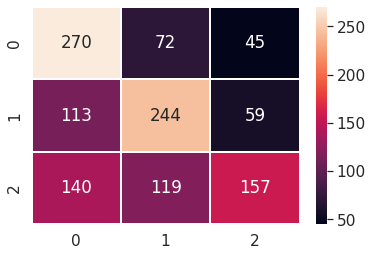

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
fpr = {}
tpr = {}
thresh ={}
n_class = 3

In [ ]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, pred_prob1[:,i], pos_label=i)

In [ ]:
pred_prob1 = mn.predict_proba(xtest)[:,1]

In [ ]:
fpr1 , tpr1, thresholds1 =metrics.roc_curve(ytest, pred_prob1,pos_label=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn.fit(xtrain, ytrain)
prediction = knn.predict(xtest)
pred_prob2 = knn.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 37.00%


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.40      0.07      0.12       387
           1       0.82      0.06      0.12       416
           2       0.35      0.95      0.52       416

    accuracy                           0.37      1219
   macro avg       0.53      0.36      0.25      1219
weighted avg       0.53      0.37      0.26      1219



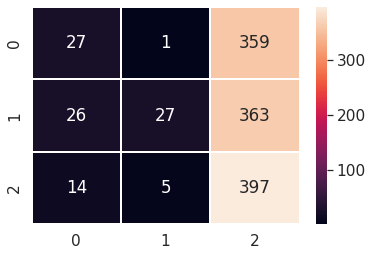

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
pred_prob2 = knn.predict_proba(xtest)[:,1]
fpr2 , tpr2, thresholds2 =metrics.roc_curve(ytest, pred_prob2,pos_label=1)

In [ ]:
from sklearn.svm import SVC

In [ ]:
lsvm= SVC(kernel="linear", probability=True)
lsvm.fit(xtrain, ytrain)
prediction = lsvm.predict(xtest)
pred_prob3 = lsvm.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 56.52%


In [ ]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.54      0.63      0.58       387
           1       0.61      0.52      0.56       416
           2       0.55      0.55      0.55       416

    accuracy                           0.57      1219
   macro avg       0.57      0.57      0.57      1219
weighted avg       0.57      0.57      0.56      1219



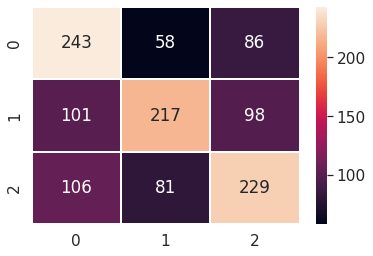

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
pred_prob3 = mn.predict_proba(xtest)[:,1]
fpr3 , tpr3, thresholds3 =metrics.roc_curve(ytest, pred_prob3,pos_label=1)

In [ ]:
ksvm= SVC(kernel = 'rbf',probability=True)
ksvm.fit(xtrain, ytrain)
prediction = ksvm.predict(xtest)
pred_prob4 = ksvm.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 56.52%


In [ ]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.56      0.62      0.59       387
           1       0.65      0.48      0.55       416
           2       0.52      0.60      0.56       416

    accuracy                           0.57      1219
   macro avg       0.58      0.57      0.56      1219
weighted avg       0.58      0.57      0.56      1219



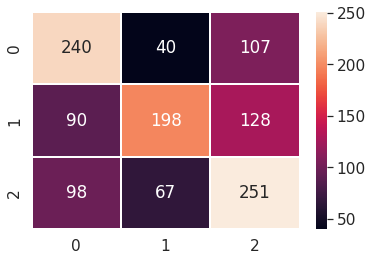

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
pred_prob4 = ksvm.predict_proba(xtest)[:,1]
fpr4 , tpr4, thresholds4 =metrics.roc_curve(ytest, pred_prob4,pos_label=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
prediction = dt.predict(xtest)
pred_prob5 = dt.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 50.37%


In [ ]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.48      0.50      0.49       387
           1       0.55      0.49      0.51       416
           2       0.49      0.52      0.50       416

    accuracy                           0.50      1219
   macro avg       0.51      0.50      0.50      1219
weighted avg       0.51      0.50      0.50      1219



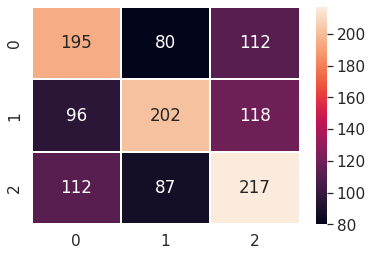

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
pred_prob5 = dt.predict_proba(xtest)[:,1]
fpr5 , tpr5, thresholds5 =metrics.roc_curve(ytest, pred_prob5,pos_label=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
rf.fit(xtrain, ytrain)
prediction = rf.predict(xtest)
pred_prob6 = rf.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))


Accuracy: 52.75%


In [ ]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       387
           1       0.63      0.45      0.52       416
           2       0.48      0.61      0.54       416

    accuracy                           0.53      1219
   macro avg       0.54      0.53      0.53      1219
weighted avg       0.54      0.53      0.53      1219



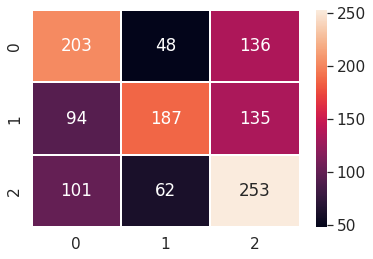

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
pred_prob6 = rf.predict_proba(xtest)[:,1]
fpr6 , tpr6, thresholds6 =metrics.roc_curve(ytest, pred_prob6,pos_label=1)

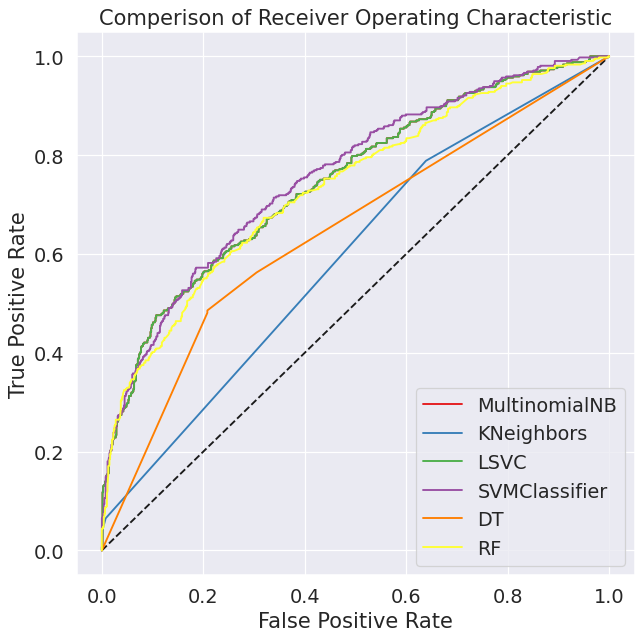

In [ ]:
plt.figure(figsize=(8, 8), dpi=90)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "MultinomialNB" )
plt.plot(fpr2, tpr2, label= "KNeighbors" )
plt.plot(fpr3, tpr3, label= "LSVC" )
plt.plot(fpr4, tpr4, label= "SVMClassifier")
plt.plot(fpr5, tpr5, label= "DT")
plt.plot(fpr6, tpr6, label= "RF")


plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Comperison of Receiver Operating Characteristic')
plt.show()